<a href="https://colab.research.google.com/github/knkamil/ml-practice-notebooks/blob/main/Week8_KMeans_Hierarchical_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv('/content/mall_customers_300_3clusters.csv')

In [157]:
data.shape

(300, 7)

In [158]:
data.head()

,Age,Annual Income (USD),Spending Score (1-100),Customer Loyalty Score,Number of Purchases,Gender,Preferred Product Category
0,27,5314,61,6,26,Female,Clothing
1,34,8930,58,5,15,Male,Groceries
2,42,13028,35,1,8,Male,Electronics
3,41,7224,69,4,13,Male,Home Appliances
4,25,4532,99,6,34,Female,Clothing


In [159]:
data.columns

Index(['Age', 'Annual Income (USD)', 'Spending Score (1-100)',
       'Customer Loyalty Score', 'Number of Purchases', 'Gender',
       'Preferred Product Category'],
      dtype='object')

In [160]:
# Convert categorical variables (Gender, Preferred Product Category) to numerical values
data_encoded = pd.get_dummies(data, columns=['Gender', 'Preferred Product Category'], drop_first=True)

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

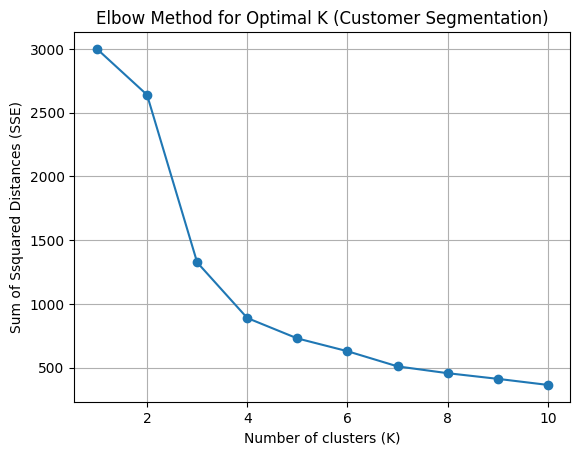

In [161]:
# K-Means Clustering with Elbow method
sse = []
k_values = range(1, 11)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_scaled)
  sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot (k_values, sse, marker='o')
plt.title('Elbow Method for Optimal K (Customer Segmentation)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Ssquared Distances (SSE)')
plt.grid(True)
plt.show()


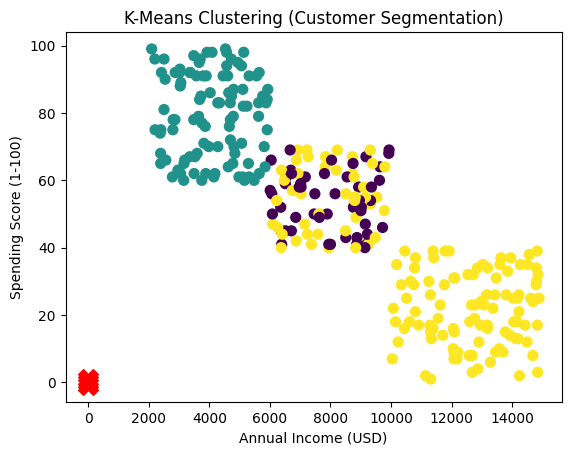

In [162]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters based on income and spending score
plt.scatter(data['Annual Income (USD)'], data['Spending Score (1-100)'], c=data['Cluster'], s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X')
plt.title('K-Means Clustering (Customer Segmentation)')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Spending Score (1-100)')
plt.show()

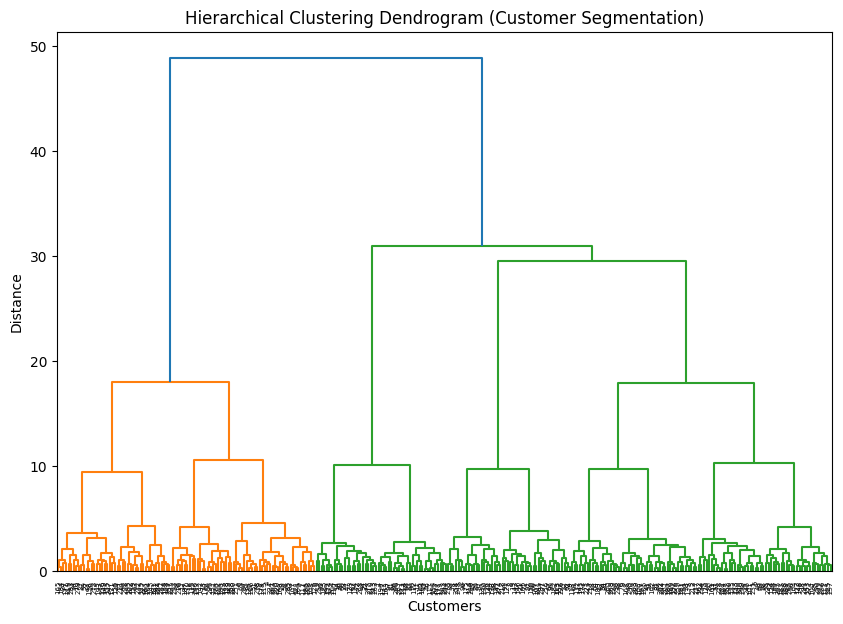

In [163]:
# Perform Hierarchical Clustering (Agglomerative)
Z = linkage(data_scaled, method='ward')

# Visualize the Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10,7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Customer Segmentation)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

**DBSCAN**

In [164]:
# Step 1: Import Libraries
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


In [165]:
# Step 2: Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

In [166]:
# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

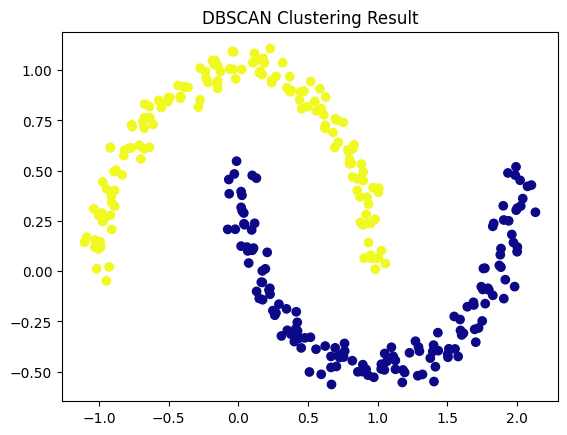

In [167]:
# Step 4: Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title('DBSCAN Clustering Result')
plt.show()

**PCA ON IRIS DATASET**

In [168]:
# Step 1: Import libraries
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [169]:
# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [170]:
# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

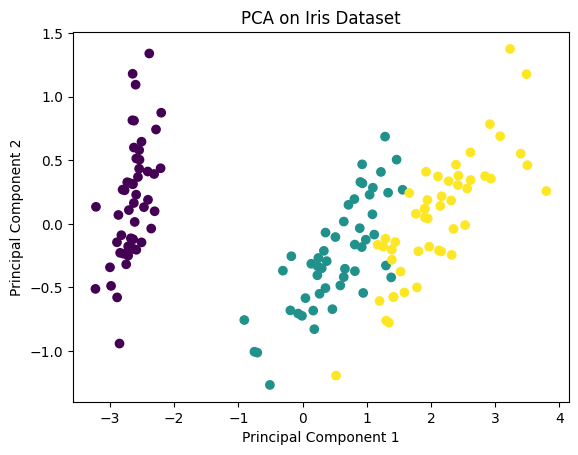

In [171]:
# Step 4: Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()

 **t-SNE on Digits Dataset**


In [172]:
# Step 3: Import Libraries
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


In [173]:
# Step 2: Load data
digits = load_digits()
X = digits.data
y = digits.target

In [174]:
# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

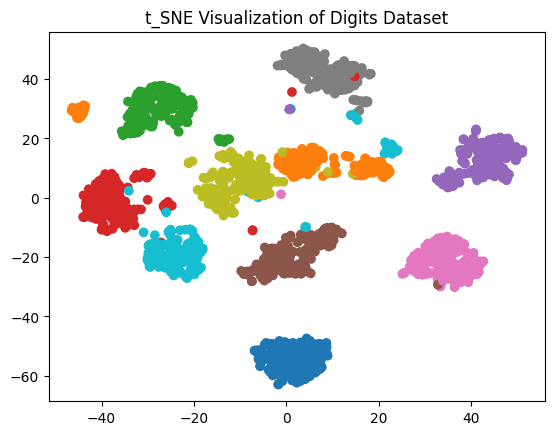

In [175]:
# Step 4: Visualize
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
plt.title('t_SNE Visualization of Digits Dataset')
plt.show()